In [0]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load MNIST data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(y_train)
x_train.shape


[5 0 4 ... 5 6 8]


(60000, 28, 28)

Unroll train examples

In [0]:
x_train_flat = x_train.flatten().reshape(60000, 784)

In [0]:
x_train_flat.shape


(60000, 784)

In [0]:
x_df = pd.DataFrame(data = x_train_flat)
x_df['target'] = y_train

In [0]:
t_5_8 = [5,8]
x_5 = x_df[x_df['target'] == t_5_8[0]]
x_8 = x_df[x_df['target'] == t_5_8[1]]
print(x_5.shape)
x_8.shape

(5421, 785)


(5851, 785)

#Sampling from large dataset

In [0]:

train_sample_5 = x_5.sample(n = 200)
train_sample_8 = x_8.sample(n = 200)
index_5 = train_sample_5.index.tolist()
index_8 = train_sample_8.index.tolist()

test_sample_5 = x_5[~x_5.index.isin(index_5)].sample(n=50)
test_sample_8 = x_8[~x_8.index.isin(index_8)].sample(n=50)

In [0]:
train_sample_5.shape

(200, 785)

Checking if test set data has datapoints common with train dataset

In [0]:
test_sample_5.index.isin(index_5)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [0]:
test_sample_8.index.isin(index_8)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [0]:
train = pd.concat([train_sample_5,train_sample_8])
train.sample(frac = 1).reset_index(drop= True)
train_y = train['target']
train_x = train.drop(labels = 'target', axis = 1)
test = pd.concat([test_sample_5,test_sample_8])
test.sample(frac = 1).reset_index(drop= True)
test_y = test['target']
test_x = test.drop(labels = 'target', axis = 1)
print(train_x.shape)
test_x.shape

(400, 784)


(100, 784)

## Calculating the mean vector of train data

In [0]:
train_mean_vector = np.array([train_x.mean(axis =0)])
train_mean_vector = train_mean_vector.T

In [0]:
train_mean_vector.shape

(784, 1)

##Covariance

In [0]:
covar_train = train_x.cov()
covar_train.shape

(784, 784)

## Eigenvectors and Eigen values

In [0]:
covar_train_eigen_val, covar_train_eigen_vec = np.linalg.eig(covar_train)
covar_train_eigen_vec.shape

(784, 784)

In [0]:
covar_train_eigen_pair = [(np.abs(covar_train_eigen_val[i]), covar_train_eigen_vec[:,i]) for i in range(len(covar_train_eigen_val))]
covar_train_eigen_pair.sort(key = lambda t:t[0], reverse = True)


In [0]:
covar_train_eigen_pair[0] # highest eigen value and respective eigen vector



(390647.50513034506,
 array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.000

## For reducing dimension to 10, pick first 10 largest eigen values and corresponding eigen vector

In [0]:
W = covar_train_eigen_pair[0][1].reshape(784,1)
for i in range(1,10):
  W = np.hstack((W, covar_train_eigen_pair[i][1].reshape(784,1)))
  

In [0]:
W.shape

(784, 10)

In [0]:
train_x_10 = (W.T).dot((train_x.T))
train_x_10.shape
test_x_10 = (W.T).dot((test_x.T))
test_x_10.shape

(10, 100)

# PCA WHITENING

(10, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


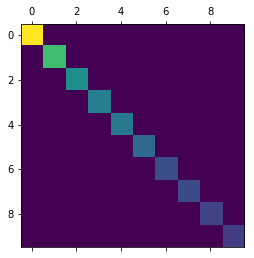

In [0]:
train_x_covar = np.cov(train_x_10)
train_x_covar_10 = np.array(train_x_covar, dtype=float)
print(train_x_covar.shape)
imgplot = plt.matshow(train_x_covar_10)

In [0]:
train_x_whit = W.dot(train_x_10)
train_x_whit = train_x_whit.T
train_frm_10 = train_x_whit.reshape(400,28,28)
train_recon_x = np.array(train_frm_10, dtype =float)
train_x_img = np.array(train_x, dtype =float)
train_x_img = train_x_img.reshape(400,28,28)

train_frm_10.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


(400, 28, 28)

In [0]:
%matplotlib inline

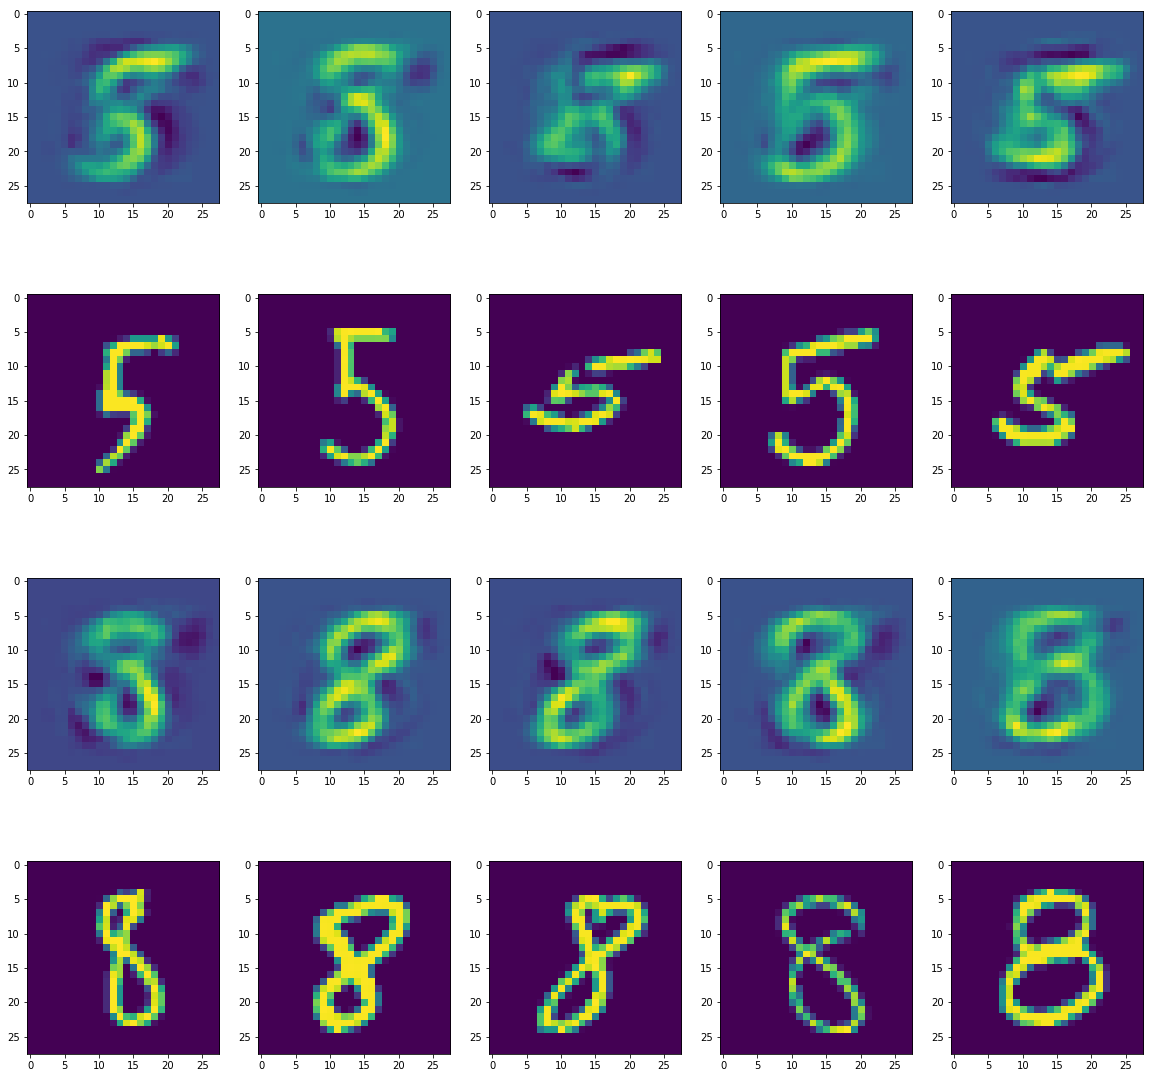

In [0]:



fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(4, 5, 1)
ax2 = fig.add_subplot(4, 5, 2)
ax3 = fig.add_subplot(4, 5, 3)
ax4 = fig.add_subplot(4, 5, 4)
ax5 = fig.add_subplot(4, 5, 5)

ax11 = fig.add_subplot(4, 5, 6)
ax22 = fig.add_subplot(4, 5, 7)
ax33 = fig.add_subplot(4, 5, 8)
ax44 = fig.add_subplot(4, 5, 9)
ax55 = fig.add_subplot(4, 5, 10)

ax6 = fig.add_subplot(4, 5, 11)
ax7 = fig.add_subplot(4, 5, 12)
ax8 = fig.add_subplot(4, 5, 13)
ax9 = fig.add_subplot(4, 5, 14)
ax10 = fig.add_subplot(4, 5, 15)

ax66 = fig.add_subplot(4, 5, 16)
ax77 = fig.add_subplot(4, 5, 17)
ax88 = fig.add_subplot(4, 5, 18)
ax99 = fig.add_subplot(4, 5, 19)
ax100 = fig.add_subplot(4, 5, 20)

ax1.imshow(train_recon_x[1])
ax2.imshow(train_recon_x[22])
ax3.imshow(train_recon_x[33])
ax4.imshow(train_recon_x[41])
ax5.imshow(train_recon_x[61])

ax11.imshow(train_x_img[1])
ax22.imshow(train_x_img[22])
ax33.imshow(train_x_img[33])
ax44.imshow(train_x_img[41])
ax55.imshow(train_x_img[61])

ax6.imshow(train_recon_x[293])
ax7.imshow(train_recon_x[276])
ax8.imshow(train_recon_x[284])
ax9.imshow(train_recon_x[291])
ax10.imshow(train_recon_x[399])

ax66.imshow(train_x_img[293])
ax77.imshow(train_x_img[276])
ax88.imshow(train_x_img[284])
ax99.imshow(train_x_img[291])
ax100.imshow(train_x_img[399])

In [0]:
train_xLD = train_x_10.T
c_0 = train_xLD[train_y==5]
c_1 = train_xLD[train_y==8]


# Reducing dimensions to 1D

In [0]:
c_0.shape
c_1.shape

(200, 10)

In [0]:
M_0 =  np.array([c_0.mean(axis =0)])
M_1 =  np.array([c_1.mean(axis =0)])
S_0 = c_0 - np.array(list(M_0)*200).reshape(200,10)
S_1 = c_1 - np.array(list(M_1)*200).reshape(200,10)
S_0 = np.dot(S_0.T,S_0)
S_1 = np.dot(S_1.T,S_1)
S_W = S_0 +S_1

In [0]:
M_0.shape

(1, 10)

In [0]:
M = np.array([train_xLD.mean(axis=0)])
S_B = 200*((M_0-M).T).dot(M_0-M)+ 200*((M_1-M).T).dot(M_1-M)
S_B.shape

(10, 10)

In [0]:
fish_eigen_val, fish_eigen_vec = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
fish_eigen_val

array([ 0.00000000e+00+0.00000000e+00j,  2.32808375e+00+0.00000000e+00j,
        9.38872691e-17-9.08365035e-34j, -1.06380481e-17-1.83368713e-33j,
        9.98845594e-18+2.44200074e-33j,  8.13286395e-18+5.39125479e-34j,
        3.63093473e-18+5.13894477e-35j, -1.51756695e-18+1.02950303e-18j,
       -1.51756695e-18-1.02950303e-18j, -1.03468434e-19+0.00000000e+00j])

In [0]:
fisher_eigen_pairs = [(np.abs(fish_eigen_val[i]), fish_eigen_vec[:,i]) for i in range(len(fish_eigen_val))]
fisher_eigen_pairs = sorted(fisher_eigen_pairs, key=lambda l: l[0], reverse=True)
fisher_eigen_pairs[0]

(2.3280837475906684,
 array([ 0.08350698+0.j, -0.58225666+0.j,  0.7503086 +0.j,  0.14450449+0.j,
        -0.06524927+0.j,  0.15807976+0.j, -0.14618553+0.j, -0.01818744+0.j,
        -0.11578347+0.j,  0.07619543+0.j]))

In [0]:
fisher_x_c_0 = c_0.dot(fisher_eigen_pairs[0][1])
fisher_x_c_1 = c_1.dot(fisher_eigen_pairs[0][1])

In [0]:
proj_M0 = M_0.dot(fisher_eigen_pairs[0][1])
proj_M1 = M_1.dot(fisher_eigen_pairs[0][1])
proj_M0


array([172.23155589+0.j])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


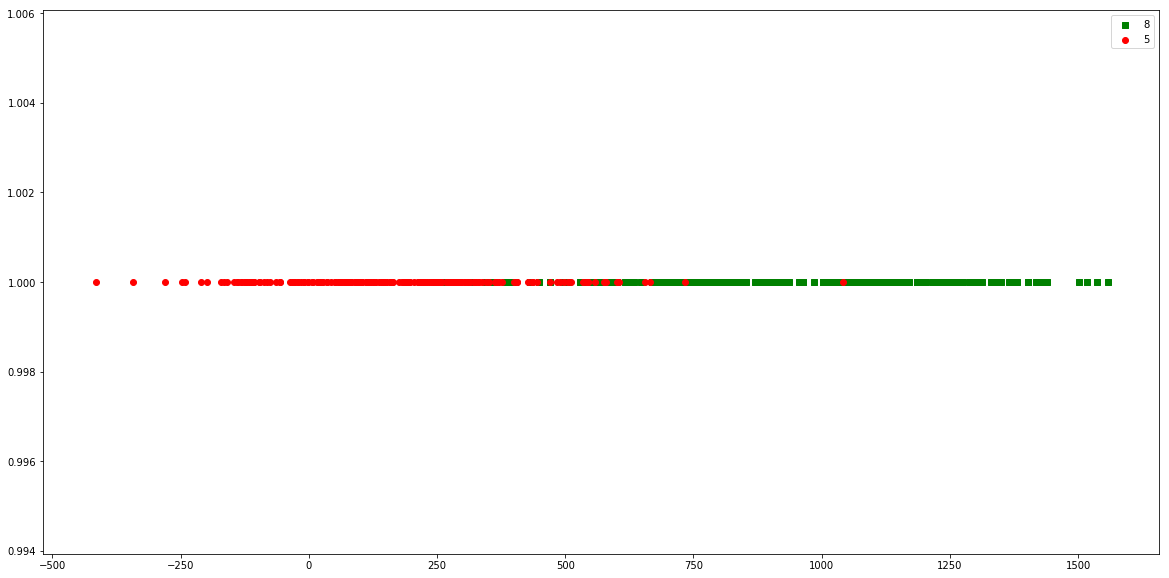

In [0]:
figure = plt.figure(figsize = (20,10))
plt.scatter(fisher_x_c_1,len(fisher_x_c_1) * [1], label='8', color='g', marker="s")
plt.scatter(fisher_x_c_0,len(fisher_x_c_0) * [1], label='5', color='r', marker="o")

plt.legend()
plt.show()


In [0]:
w = fisher_eigen_pairs[0][1]
d = 0
proj_mean = (0.5)*(M_0.dot(w)+ M_1.dot(w))
proj_mean
if proj_M0<proj_mean:
  d = 0
else:
  d=1

# Predicting test labels

In [0]:
test_xLD = test_x_10.T
c0_test = test_xLD[test_y==5]
c1_test = test_xLD[test_y==8]
test_c0_pred = c0_test.dot(fisher_eigen_pairs[0][1])
test_c1_pred = c1_test.dot(fisher_eigen_pairs[0][1])

In [0]:
pred_c_0 = []
pred_c_1 = []
c_wrong = 0
c0_wrong = 0
c1_wrong = 0
for i in range(0,200):
  if d==0:
    if fisher_x_c_0[i]>proj_mean:
      pred_c_0.append(8)
      c_wrong = c_wrong +1
      c0_wrong = c0_wrong +1
    else: 
      pred_c_0.append(5)
    if fisher_x_c_1[i]>proj_mean:
      pred_c_1.append(8)
    else: 
      pred_c_1.append(5)
      c_wrong = c_wrong +1
      c1_wrong = c1_wrong +1
  else:
    if fisher_x_c_0[i]<=proj_mean:
      pred_c_0.append(8)
      c_wrong = c_wrong +1
      c0_wrong = c0_wrong +1
    else: 
      pred_c_0.append(5)
    if fisher_x_c_1[i]<=proj_mean:
      pred_c_1.append(8)
    else: 
      pred_c_1.append(5)
      c_wrong = c_wrong +1
      c1_wrong = c1_wrong +1

# MODEL ACCURACY

In [0]:
print('training accuracy  = ', (400 - c_wrong)/4)
print('Class 0 (true label = 5) training accuracy  = ', (200 - c0_wrong)/2)
print('Class 1 (true label = 8) training accuracy  = ', (200 - c1_wrong)/2)
print('test accuracy  = ', (100 - test_c))
print('Class 0 (true label = 5) test accuracy  = ', (50 - test_c0)/0.5)
print('Class 1 (true label = 8) test accuracy  = ', (50 - test_c1)/0.5)

training accuracy  =  93.0
Class 0 (true label = 5) training accuracy  =  95.5
Class 1 (true label = 8) training accuracy  =  90.5
test accuracy  =  71
Class 0 (true label = 5) test accuracy  =  6.0
Class 1 (true label = 8) test accuracy  =  94.0
